## Import

In [ ]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# def seed_everything(seed):
#     random.seed(seed)
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     np.random.seed(seed)
# seed_everything(37) # Seed 고정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir("/content/drive/MyDrive/dacon_all(LG 음향 상추)/LG/data")

In [ ]:
os.getcwd()

'/content/drive/MyDrive/dacon_all(LG 음향 상추)/LG/data'

## Data Load

In [ ]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [ ]:
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

## Data Pre-processing

In [ ]:
# train_x = train_x.fillna(0)
# test_x = test_x.fillna(0)

In [ ]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import time
# sklearn 관련
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
# xgboost 관련
from xgboost import XGBClassifier
from xgboost import plot_importance
# lightgbm 관련
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

In [ ]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, valid_x, y_train, valid_y = train_test_split(train_x, train_y, test_size=0.2, random_state= 2023, shuffle=True)

print("훈련데이터 X와 y의 차원:", X_train.shape, y_train.shape)
print("시험데이터 X와 y의 차원:", valid_x.shape, valid_y.shape)

훈련데이터 X와 y의 차원: (478, 2877) (478,)
시험데이터 X와 y의 차원: (120, 2877) (120,)


In [ ]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dvalid = xgb.DMatrix(data=valid_x, label = valid_y)

#xgboost:

In [ ]:
params = {'max_depth' : 3,  #3
         'eta' : 0.01,    # 0.1   # 0.01
        "objective": "multi:softmax",
        'num_class': 3,
        # 'subsample': 0.9,
        # "colsample_bytree" : .7,  
         'early_stoppings' : 100 }

num_rounds = 1000        # 400   # 1000

In [ ]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dvalid,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[0]	train-merror:0.161088	eval-merror:0.266667
[1]	train-merror:0.156904	eval-merror:0.258333
[2]	train-merror:0.158996	eval-merror:0.241667
[3]	train-merror:0.161088	eval-merror:0.25
[4]	train-merror:0.165272	eval-merror:0.25
[5]	train-merror:0.165272	eval-merror:0.25
[6]	train-merror:0.165272	eval-merror:0.25
[7]	train-merror:0.165272	eval-merror:0.25
[8]	train-merror:0.165272	eval-merror:0.25
[9]	train-merror:0.165272	eval-merror:0.25
[10]	train-merror:0.165272	eval-merror:0.25
[11]	train-merror:0.165272	eval-merror:0.25
[12]	train-merror:0.165272	eval-merror:0.25
[13]	train-merror:0.16318	eval-merror:0.25
[14]	train-merror:0.16318	eval-merror:0.25
[15]	train-merror:0.165272	eval-merror:0.25
[16]	train-merror:0.16318	eval-merror:0.25
[17]	train-merror:0.16318	eval-merror:0.25
[18]	train-merror:0.165272	eval-merror:0.25
[19]	train-merror:0.169456	eval-merror:0.25
[20]	train-merror:0.165272	eval-merror:0.266667
[21]	train-merror:0.161088	eval-merror:0.258333
[22]	train-merror:0.161088

In [ ]:
best_rounds = xgb_model.best_iteration
best_rounds

999

In [ ]:
pred_probs = xgb_model.predict(dvalid)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(int(pred_probs[1]))

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
2


In [ ]:
pred = []
for i in range(len(pred_probs)):
  pred.append(int(pred_probs[i]))

In [ ]:
pred[:10]

[1, 2, 1, 1, 2, 0, 2, 1, 1, 1]

In [ ]:
valid_y[:10]

513    1
243    2
574    1
564    2
501    1
432    1
160    2
184    1
206    1
161    0
Name: Y_Class, dtype: int64

In [ ]:
# 정확도 불러오기
def get_clf_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

In [ ]:
get_clf_eval(valid_y, pred)

0.7583333333333333


## Inference

In [ ]:
dtest = xgb.DMatrix(data=test_x)

In [ ]:
preds = xgb_model.predict(dtest)
preds

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 2., 2., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 2., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
pred = []
for i in range(len(preds)):
  pred.append(int(preds[i]))
pred[:10]

[1, 1, 1, 1, 1, 1, 1, 0, 0, 1]

#lightGBM _ 그리드서치
https://assaeunji.github.io/machine%20learning/2021-01-07-xgboost/

https://www.kaggle.com/code/bitit1994/parameter-grid-search-lgbm-with-scikit-learn/notebook

In [ ]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dvalid,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
# xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)



```
params2 = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'objective' : ["multi:softmax"],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [2023],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4]
}
```



In [ ]:
from lightgbm import LGBMClassifier

tic = time.time()

params = {
    'max_depth':[3, 5, 7],
    'min_child_samples':[60,100],
    'subsample':[0.8,1],
    "objective": ["multi:softmax"],
    # 'num_leaves': [16,32],
    'lerning_rate' : [0.01,0.1],   # 0.1   # 0.01
    'num_class': [3]
}



lgbm = LGBMClassifier(n_estimator = 100)


gridcv = GridSearchCV(lgbm, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'error',
          eval_set = [(X_train, y_train), (valid_x, valid_y)])

toc = time.time()

print('Optimized hyperparameters', gridcv.best_params_) # {'max_depth': 128, 'min_child_samples': 60, 'subsample': 0.8}
print('time elapsed:', toc - tic) # 46초

[1]	valid_0's multi_error: 0.317992	valid_0's multi_logloss: 0.820077	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.848527
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's multi_error: 0.317992	valid_0's multi_logloss: 0.799117	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.848524
[3]	valid_0's multi_error: 0.317992	valid_0's multi_logloss: 0.780652	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.847648
[4]	valid_0's multi_error: 0.317992	valid_0's multi_logloss: 0.7649	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.845987
[5]	valid_0's multi_error: 0.317992	valid_0's multi_logloss: 0.751948	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.845761
[6]	valid_0's multi_error: 0.317992	valid_0's multi_logloss: 0.740594	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.847394
[7]	valid_0's multi_error: 0.317992	valid_0's multi_logloss: 0.729732	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.849413
[8]	valid

In [ ]:
print(gridcv.best_params_)
print(gridcv.best_score_)

{'lerning_rate': 0.01, 'max_depth': 3, 'min_child_samples': 60, 'num_class': 3, 'objective': 'multi:softmax', 'subsample': 0.8}
0.6820230607966457


In [ ]:
tic = time.time()

# lgbm = LGBMClassifier(n_estimators = 1000, lerning_rate = 0.01, max_depth = 128, min_child_samples = 60, subsample = 0.8, num_class = 3,random_state = 2023)
# lgbm.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "error", eval_set = [(X_train, y_train), (valid_x, valid_y)])


lgbm = LGBMClassifier(n_estimators = 100, lerning_rate = 0.01, max_depth = 3, #min_child_samples = 60, subsample = 0.8, 
                      num_leaves = 6, objective = 'multi:softmax', num_class = 3,random_state = 2023)
lgbm.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "error", eval_set = [(X_train, y_train), (valid_x, valid_y)])


toc = time.time()

print('time elapsed:', toc - tic) # 1.87

[1]	training's multi_error: 0.317992	training's multi_logloss: 0.794882	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.825738
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_error: 0.317992	training's multi_logloss: 0.755848	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.805158
[3]	training's multi_error: 0.317992	training's multi_logloss: 0.722374	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.791047
[4]	training's multi_error: 0.317992	training's multi_logloss: 0.69331	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.779114
[5]	training's multi_error: 0.317992	training's multi_logloss: 0.670432	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.77318
[6]	training's multi_error: 0.292887	training's multi_logloss: 0.649006	valid_1's multi_error: 0.325	valid_1's multi_logloss: 0.766901
[7]	training's multi_error: 0.267782	training's multi_logloss: 0.630108	valid_1's multi_error: 0.3	valid_1's multi_logloss: 0.759

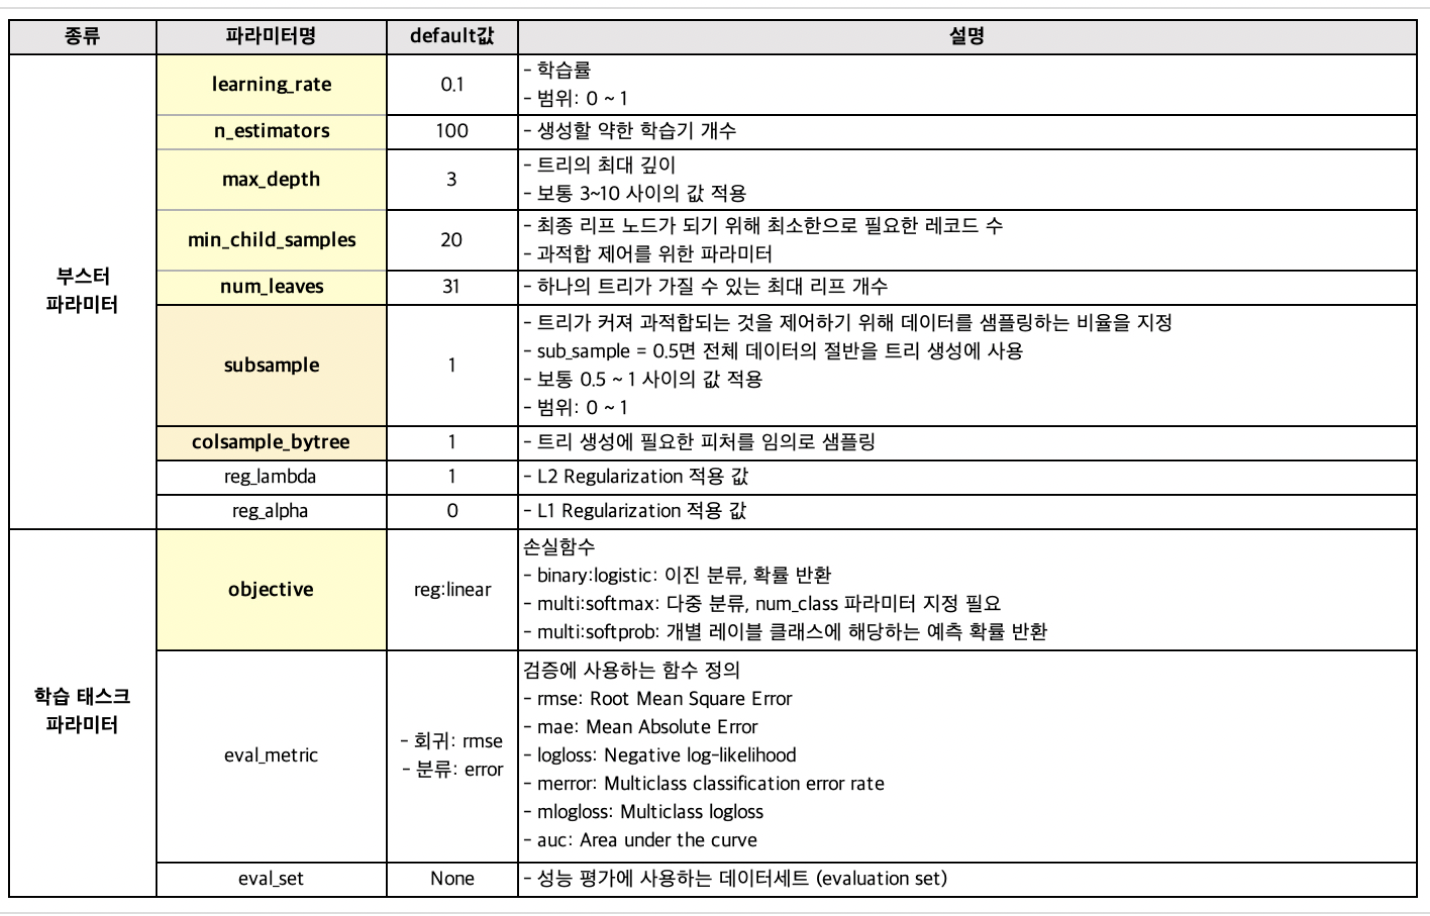

In [ ]:
pred_probs = lgbm.predict(valid_x)
pred_probs

array([1, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
valid_y

513    1
243    2
574    1
564    2
501    1
      ..
61     1
593    1
545    0
102    1
79     2
Name: Y_Class, Length: 120, dtype: int64

In [ ]:
accuracy_score(valid_y,pred_probs)

0.7666666666666667

##inference

In [ ]:
preds = lgbm.predict(test_x)
preds

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

# Submit

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
submit['Y_Class'] = preds

In [ ]:
submit.to_csv('./r_0215_lightGBM_2.csv', index=False)